## Table of Contents <a class="anchor" id="top"></a>

- [Background](#background)
- [Key Findings](#key)
- [Loading the Data](#load)
- [Inspecting the Data](#inspect)
- [Cleaning the Data](#clean)
- [Getting Acquainted with the Data](#get)
- [Exploratory Analysis](#explore)
- [Recommendations](#recs)
- [Questions](#questions)
- [Appendix](#appendix)

### Background <a class="anchor" id="background"></a>

The dataset provided was for a take-home assignment for a medium-sized technology education company. I had a lot of fun working through this one. Enjoy!

### Key Findings <a class="anchor" id="key"></a>

- First time visits peaked in July of 2017 and represented ~30% of all first-time visits between July 2017 and May 2018. 

- 15.5% of first time users did not return for a second session, which also represents the largest user drop-off between subsequent sessions. 

- Users tended to perform the most searches during their first sessions.

- Both average number of clip views and average viewing time tended to peak during the 3rd sessions, followed by a sharp decrease over the next 4 sessions. 

- B2C users clocked in the most viewing time during July '17 and March '18, while the B2B users top months were November '17 and December '17 consecutively. A sharp drop of viewing time is noted in May '18 for both user types.

- Cumulative viewing time is higher during the week  but average viewing time seems to be as high if not higher on the weekends.

#### [Jump to Top](#top)

### Loading the data <a class="anchor" id="load"></a>

- Import libraries
- Import dataset
- Filter warnings


#### [Jump to Top](#top)

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import dataset 
df = pd.read_csv('Saumya PAE_Assignment_Data.csv')

#filter output warnings
import warnings
warnings.filterwarnings('ignore')

### Inspecting the Data <a class="anchor" id="inspect"></a>

Immediate insights
- There are 13,754 total records and 11 total fields
- There are two types of data: object & float
- There are 110 null values in column

*Upon further investigation, it appears these 110 null values in each column correspond to 110 null records. Being concerned about there could be some systematic reason for these null records I decided to check their indices, which indicate these null records are at the very end of the dataset. I also checked what percentage of the entire dataset are null records to gauge the potential impact of dropping these values.  



#### [Jump to Top](#top)

In [3]:
df.head()

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
0,"1,261",1.0,3/12/18,18.0,"2,373","2,563","173,376",1.0,0.0,6.0,5.0
1,"1,261",2.0,3/13/18,15.0,"2,453","2,765","115,584",1.0,0.0,1.0,5.0
2,"1,261",3.0,3/14/18,22.0,3296,"4,627","86,688",1.0,0.0,2.0,5.0
3,"1,261",4.0,3/15/18,45.0,"6,337","7,121","173,376",1.0,0.0,2.0,3.0
4,"1,261",5.0,3/16/18,27.0,"4,393","4,968","260,064",1.0,0.0,4.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13754 entries, 0 to 13753
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   acct_id                 13644 non-null  object 
 1   visit_num               13644 non-null  float64
 2   visit_dt                13644 non-null  object 
 3   clip_views              13644 non-null  float64
 4   view_time_sec           13644 non-null  object 
 5   total_clip_length_sec   13644 non-null  object 
 6   total_course_lngth_sec  13644 non-null  object 
 7   courses_viewed          13644 non-null  float64
 8   b2b_visit_indicator     13644 non-null  float64
 9   page_views              13644 non-null  float64
 10  searches                13644 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


In [5]:
#check number of null values per column
df.isnull().sum()

acct_id                   110
visit_num                 110
visit_dt                  110
clip_views                110
view_time_sec             110
total_clip_length_sec     110
total_course_lngth_sec    110
courses_viewed            110
b2b_visit_indicator       110
page_views                110
searches                  110
dtype: int64

In [6]:
#create new column to indicate if entire record is null
df['is_na'] = df[df.columns].isnull().apply(lambda x: all(x), axis=1)

#check value counts 
df.is_na.value_counts()

False    13644
True       110
Name: is_na, dtype: int64

In [7]:
#check null records as percentage of entire dataset
percent_null_records = round(len(df[df['is_na'] == True])/len(df) * 100, 2)
percent_null_records

0.8

In [8]:
#check index of null records
na_index = df[df['is_na'] != False].index.tolist()
na_index

[13644,
 13645,
 13646,
 13647,
 13648,
 13649,
 13650,
 13651,
 13652,
 13653,
 13654,
 13655,
 13656,
 13657,
 13658,
 13659,
 13660,
 13661,
 13662,
 13663,
 13664,
 13665,
 13666,
 13667,
 13668,
 13669,
 13670,
 13671,
 13672,
 13673,
 13674,
 13675,
 13676,
 13677,
 13678,
 13679,
 13680,
 13681,
 13682,
 13683,
 13684,
 13685,
 13686,
 13687,
 13688,
 13689,
 13690,
 13691,
 13692,
 13693,
 13694,
 13695,
 13696,
 13697,
 13698,
 13699,
 13700,
 13701,
 13702,
 13703,
 13704,
 13705,
 13706,
 13707,
 13708,
 13709,
 13710,
 13711,
 13712,
 13713,
 13714,
 13715,
 13716,
 13717,
 13718,
 13719,
 13720,
 13721,
 13722,
 13723,
 13724,
 13725,
 13726,
 13727,
 13728,
 13729,
 13730,
 13731,
 13732,
 13733,
 13734,
 13735,
 13736,
 13737,
 13738,
 13739,
 13740,
 13741,
 13742,
 13743,
 13744,
 13745,
 13746,
 13747,
 13748,
 13749,
 13750,
 13751,
 13752,
 13753]

### Cleaning the data <a class="anchor" id="clean"></a>

Tasks:
- Drop empty records
- Remove comma from acct_id and convert to numeric
- Convert visit_dt to datetime
- Remove commas from view_time_sec and convert to numeric
- Remove commas from total_clip_length_sec and convert to numeric
- Remove commas from total_course_lngth_sec convert to to numeric
- Reexamine numeric fields
- Add another column for 'type' to label the user B2B or B2C (since this is not an ordinal categorical variable I believe this will be easier to work with than the dummy variables)
- Add column reflecting total course length in hours
- Add column to show average viewing time per clip
- Add column to show completion rate of clips viewed during that session
- Add column for month & assign order
- Add column for day & assign order

#### [Jump to Top](#top)

In [9]:
#Drop null records
df = df.dropna()

#reset index
df.reset_index(inplace=True, drop=True)

In [10]:
#Double check no more null values
df.isnull().sum()

acct_id                   0
visit_num                 0
visit_dt                  0
clip_views                0
view_time_sec             0
total_clip_length_sec     0
total_course_lngth_sec    0
courses_viewed            0
b2b_visit_indicator       0
page_views                0
searches                  0
is_na                     0
dtype: int64

In [11]:
#check for duplicate values
df.duplicated().value_counts()

False    13644
dtype: int64

In [12]:
#remove comma from acct_id and convert to int
df['acct_id'] = df['acct_id'].str.replace(',', '').astype(int)

In [13]:
#convert visit_dt to datetime
df['visit_dt'] = pd.to_datetime(df['visit_dt'])

In [14]:
#remove comma from view_time_sec and convert to numeric
df['view_time_sec'] = df['view_time_sec'].str.replace(',', '').astype(int)

In [15]:
#create view time in minutes field
df['view_time_min'] = df['view_time_sec'].apply(lambda x: x/60)

In [16]:
#remove comma from total_clip_length_sec and convert to numeric
df['total_clip_length_sec'] = df['total_clip_length_sec'].str.replace(',', '').astype(int)

In [17]:
#remove comma from total_course_lngth_sec and convert to numeric
df['total_course_lngth_sec'] = df['total_course_lngth_sec'].str.replace(',', '').astype(int)

In [18]:
#add new column for type
df['type'] = df['b2b_visit_indicator'].apply(lambda x: 'B2B' if x == 1.0 else 'B2C')

In [19]:
#create new field to convert total course length to hours
df['total_course_lngth_hours'] = df['total_course_lngth_sec'].apply(lambda x: x/60/60)

In [20]:
#create new field for average viewing time per clip
df['avg_viewing_time_per_clip'] = df['view_time_sec']/df['clip_views']

In [21]:
#create new field for clip completion rate
df['clip_completion_rate'] = df['view_time_sec']/df['total_clip_length_sec']

In [22]:
#create new column for month
df['month'] = df['visit_dt'].dt.month
df['month'] = pd.Categorical(df['month'], [7,8,9,10,11,12,1,2,3,4,5], ordered=True)


#create new column for day
df['day'] = df['visit_dt'].dt.dayofweek
df['day'] = pd.Categorical(df['day'], [0,1,2,3,4,5,6], ordered=True)


In [23]:
df.head()

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches,is_na,view_time_min,type,total_course_lngth_hours,avg_viewing_time_per_clip,clip_completion_rate,month,day
0,1261,1.0,2018-03-12,18.0,2373,2563,173376,1.0,0.0,6.0,5.0,False,39.550000,B2C,48.160000,131.833333,0.925868,3,0
1,1261,2.0,2018-03-13,15.0,2453,2765,115584,1.0,0.0,1.0,5.0,False,40.883333,B2C,32.106667,163.533333,0.887161,3,1
2,1261,3.0,2018-03-14,22.0,3296,4627,86688,1.0,0.0,2.0,5.0,False,54.933333,B2C,24.080000,149.818182,0.712341,3,2
3,1261,4.0,2018-03-15,45.0,6337,7121,173376,1.0,0.0,2.0,3.0,False,105.616667,B2C,48.160000,140.822222,0.889903,3,3
4,1261,5.0,2018-03-16,27.0,4393,4968,260064,1.0,0.0,4.0,0.0,False,73.216667,B2C,72.240000,162.703704,0.884259,3,4


In [24]:
df.columns

Index(['acct_id', 'visit_num', 'visit_dt', 'clip_views', 'view_time_sec',
       'total_clip_length_sec', 'total_course_lngth_sec', 'courses_viewed',
       'b2b_visit_indicator', 'page_views', 'searches', 'is_na',
       'view_time_min', 'type', 'total_course_lngth_hours',
       'avg_viewing_time_per_clip', 'clip_completion_rate', 'month', 'day'],
      dtype='object')

In [25]:
df = df.drop(['b2b_visit_indicator', 'is_na'], axis=1)

### Getting Acquainted with the Data <a class="anchor" id="get"></a>

Now that the data is cleaned I will work to understand the various fields. 

Field insights:

`acct_id`
- There are 1001 distinct account ids

`visit_num`
- The typical user visited the platform around 13 times during the time period in which the data was gathered
- Most visits by a user was 153 with the least being 1

`clip_views`
- The typical user views 21 clips during each visit
- Max: 910, Min: 1
- There are 2 distinct outliers, which upon further investigation are due to a single 'power' user that over 600 views on two separate occasions

`view_time_sec`
- The typical viewing time per session was around 4,026 seconds (67 minutes) with less than 1% of observations clocking in over 4 hours of viewing time per session 
- Max: 11 hours, Min: 12 seconds

`total_clip_length_sec`
- The average total length of the clips viewed per session was around 5,324 seconds (~89 minutes)
- Max 208,513 seconds (~37 hours), Min: 12 seconds
- There are 3 distinct outliers exceeding more than 100,000 seconds (~28 hours) in length

`total_course_lngth_sec`
- The typical duration of the courses from which video clips were viewed each session is ~70 hours
- Max: 3352 hours, Min: ~17 minutes

`courses_viewed`
- The average number of courses viewed per session is ~1.5
- Max: 22, Min: 1
- There are 16 outliers representing sessions where the number of courses viewed > 5

`page_views`
- The typical number of page views per session is ~4
- Max: 19, Min: 1
- There are 7 outliers representing user sessions that exceeded 12.5 page views

`searches`
- The typical number of searches per session is ~2
- Max: 14, Min: 0
- There are 7 outliers representing sessions where more than 7 searches were made

`avg_clip_length`
- the typical clip length per session is about 290 seconds

`clip_completion_rate`
- The average clip completion rate is about 17%

`month`
- Number of sessions peak in March

`day`
- Number of sessions is typically highest on Tuesday/Wednesday and lowest on the weekends

#### [Jump to Top](#top)

In [26]:
df.describe()

,acct_id,visit_num,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,page_views,searches,view_time_min,total_course_lngth_hours,avg_viewing_time_per_clip,clip_completion_rate
count,13644.000000,13644.000000,13644.000000,13644.000000,13644.000000,1.364400e+04,13644.000000,13644.000000,13644.000000,13644.000000,13644.000000,13644.000000,13644.000000
mean,1716.179420,21.128042,21.432498,4026.209469,5324.848798,2.505053e+05,1.483949,4.298373,1.888156,67.103491,69.584815,241.174725,0.827911
std,286.854475,23.935015,24.241938,3848.833272,5976.236783,4.109100e+05,1.103707,3.178949,2.442407,64.147221,114.141675,186.819816,0.201752
min,1200.000000,1.000000,1.000000,12.000000,12.000000,1.000000e+03,1.000000,1.000000,0.000000,0.200000,0.277778,5.052632,0.020253
25%,1456.000000,5.000000,6.000000,1205.000000,1519.000000,4.450775e+04,1.000000,2.000000,0.000000,20.083333,12.363264,136.066176,0.720084
50%,1716.000000,12.000000,15.000000,2974.500000,3819.000000,1.228560e+05,1.000000,3.000000,1.000000,49.575000,34.126667,195.535897,0.898617
75%,1971.000000,29.000000,31.000000,5702.250000,7390.500000,2.955072e+05,2.000000,6.000000,3.000000,95.037500,82.085347,285.000000,1.000000
max,2200.000000,153.000000,910.000000,40086.000000,208513.000000,1.206972e+07,22.000000,19.000000,14.000000,668.100000,3352.701389,2576.000000,1.000000


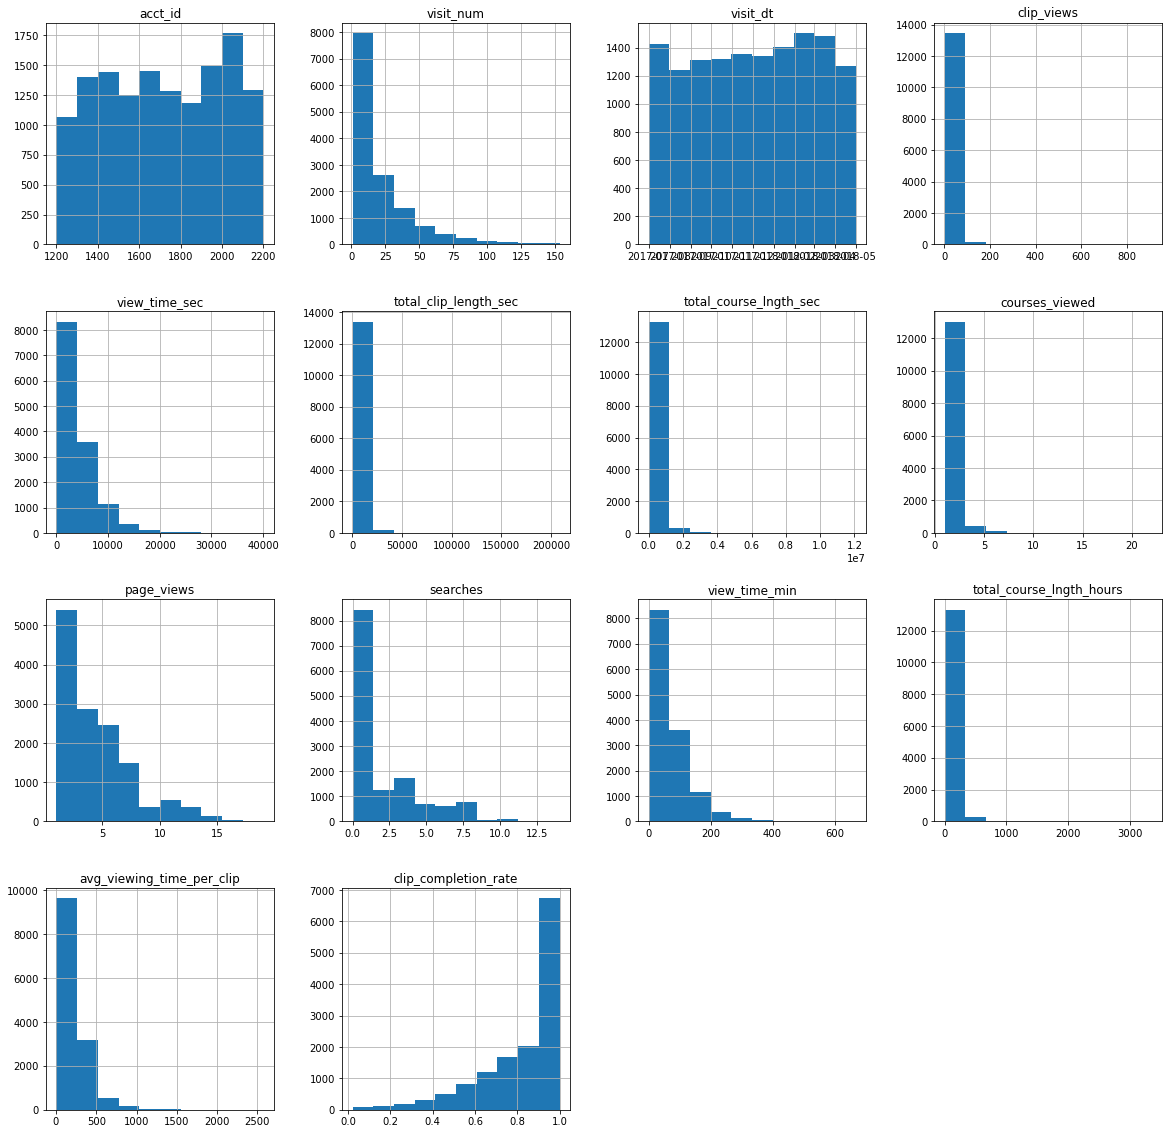

In [27]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

Based on the group of histograms above, there are a few fields that seem to have outliers and will require further investigation. 

In [28]:
#check number of distinct acct_ids
df['acct_id'].nunique()

1001

In [29]:
df['acct_id'].value_counts().describe()

count    1001.000000
mean       13.630370
std        19.414562
min         1.000000
25%         2.000000
50%         6.000000
75%        16.000000
max       153.000000
Name: acct_id, dtype: float64

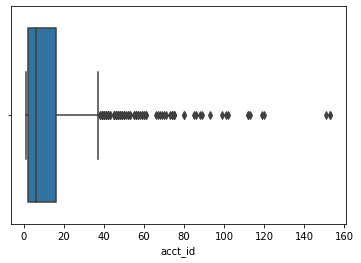

In [30]:
plt.figure()
sns.boxplot(df['acct_id'].value_counts())
plt.show()

In [31]:
df['visit_dt'].describe()

count                   13644
unique                    305
top       2018-03-07 00:00:00
freq                       71
first     2017-07-01 00:00:00
last      2018-05-01 00:00:00
Name: visit_dt, dtype: object

In [32]:
df['month'].value_counts()

3     1544
1     1493
7     1424
10    1374
11    1364
2     1328
12    1295
8     1291
4     1264
9     1262
5        5
Name: month, dtype: int64

In [33]:
df['day'].value_counts()

1    2405
2    2300
0    2253
3    2241
4    2080
6    1248
5    1117
Name: day, dtype: int64

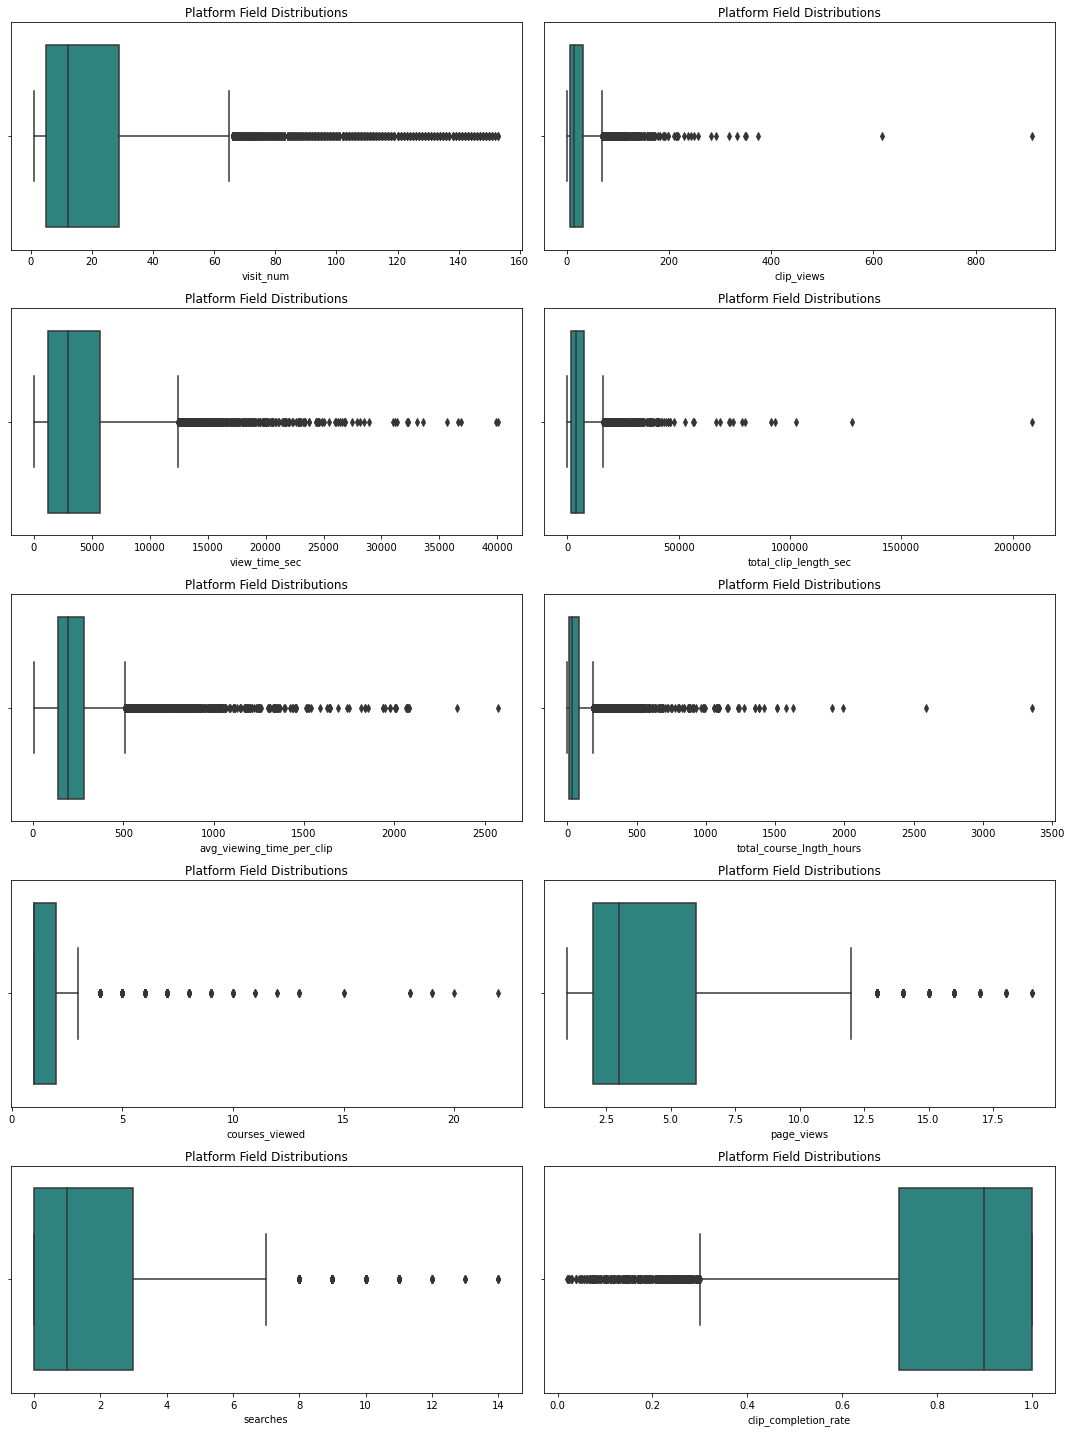

In [34]:
# columns to plot 
cols = ['visit_num', 'clip_views', 'view_time_sec',
       'total_clip_length_sec', 'avg_viewing_time_per_clip', 'total_course_lngth_hours', 'courses_viewed',
       'page_views', 'searches', 'clip_completion_rate']
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(15,20))
# loop through number of columns to plot
for i in range(len(cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(5, 2, plot)
    # boxplots to see distributions
    sns.boxplot(data=df, x=df[cols[i]], palette="viridis")
    plt.title("Platform Field Distributions")

plt.tight_layout()
plt.show()

In [35]:
df[df['clip_views'] > 400]

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,page_views,searches,view_time_min,type,total_course_lngth_hours,avg_viewing_time_per_clip,clip_completion_rate,month,day
12390,1728,2.0,2017-12-25,910.0,39886,208513,12069725,19.0,11.0,6.0,664.766667,B2C,3352.701389,43.830769,0.191288,12,0
12391,1728,3.0,2017-12-27,616.0,18388,127723,5878476,5.0,10.0,5.0,306.466667,B2C,1632.910000,29.850649,0.143968,12,2


It looks like a single consumer user has an extreme amount of clip views on two separate days. Based on the view_time_sec, this user clocked in over 11 hours of viewing time on December 25th, 2017.  

### Exploratory Analysis <a class="anchor" id="explore"></a>

Now that I have an understanding of the fields I can explore the dataset even further. First I will look at various associations using Python and then export this file to Tableau for additional visual analysis. 

Insights

- There seems to be a moderate negative correlation between `searches` and `visit_num` of -0.40, indicating that users are making less searches as they visit more often. This may be an indication that some first time users are having a difficult time finding what they are looking for
- There's a strong positive correlation between `clip_views` and `total_clip_length_sec` of 0.87, which raises the question: are longer clips more popular?
- Strong negative correlation between `clip_views` and `avg_viewing_time_per_clip` & `clip_completion_rate`, which makes sense because if a viewer is looking at more clips in a given session, they will spend less time viewing each clip and consequently finish less clips
- Strong correlation between `total_clip_length_sec` and `total_course_lngth_sec`, indicating that longer courses tend have longer clips
- Shorter clips tend to have a higher completion rate
- Strong positive correlation between `page_views` and `courses_viewed`
- As a user visits more often, they tend to perform less searches
- User completion rate increases as number of clips viewed per session decreases
- The longest clips get the most viewing time but have the lowest completion rate
- As the visit number increases, the clip completion rate decreases slightly

#### [Jump to Top](#top)

In [36]:
# show correlations
df.corr()

,acct_id,visit_num,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,page_views,searches,view_time_min,total_course_lngth_hours,avg_viewing_time_per_clip,clip_completion_rate
acct_id,1.000000,0.065199,0.026137,0.020952,0.031201,0.017187,0.038342,0.019877,-0.003704,0.020952,0.017187,0.001460,-0.043385
visit_num,0.065199,1.000000,0.008153,0.037092,0.028804,0.033303,0.058021,0.043908,-0.406774,0.037092,0.033303,0.068129,-0.028553
clip_views,0.026137,0.008153,1.000000,0.705664,0.876934,0.793913,0.408945,0.288489,0.158032,0.705664,0.793913,-0.252348,-0.278344
view_time_sec,0.020952,0.037092,0.705664,1.000000,0.825885,0.528140,0.304155,0.235759,0.118307,1.000000,0.528140,0.040684,-0.014358
total_clip_length_sec,0.031201,0.028804,0.876934,0.825885,1.000000,0.696013,0.406547,0.276341,0.134474,0.825885,0.696013,-0.062468,-0.317087
total_course_lngth_sec,0.017187,0.033303,0.793913,0.528140,0.696013,1.000000,0.326050,0.221027,0.096951,0.528140,1.000000,-0.183190,-0.239411
courses_viewed,0.038342,0.058021,0.408945,0.304155,0.406547,0.326050,1.000000,0.625527,0.283584,0.304155,0.326050,-0.142138,-0.237737
page_views,0.019877,0.043908,0.288489,0.235759,0.276341,0.221027,0.625527,1.000000,0.294901,0.235759,0.221027,-0.125677,-0.185654
searches,-0.003704,-0.406774,0.158032,0.118307,0.134474,0.096951,0.283584,0.294901,1.000000,0.118307,0.096951,-0.125934,-0.083447
view_time_min,0.020952,0.037092,0.705664,1.000000,0.825885,0.528140,0.304155,0.235759,0.118307,1.000000,0.528140,0.040684,-0.014358


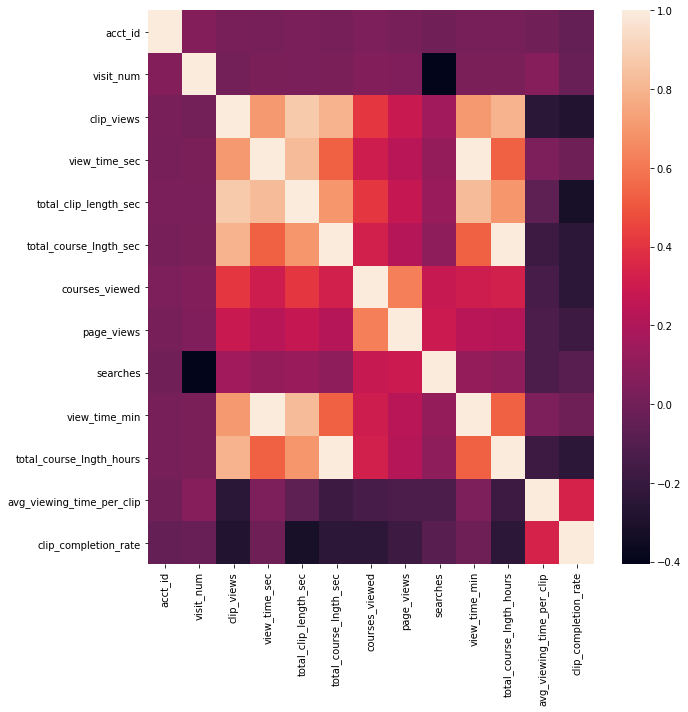

In [37]:
plt.figure(figsize=(10,10))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=df.corr(),annot=False)
plt.tight_layout()
plt.show()

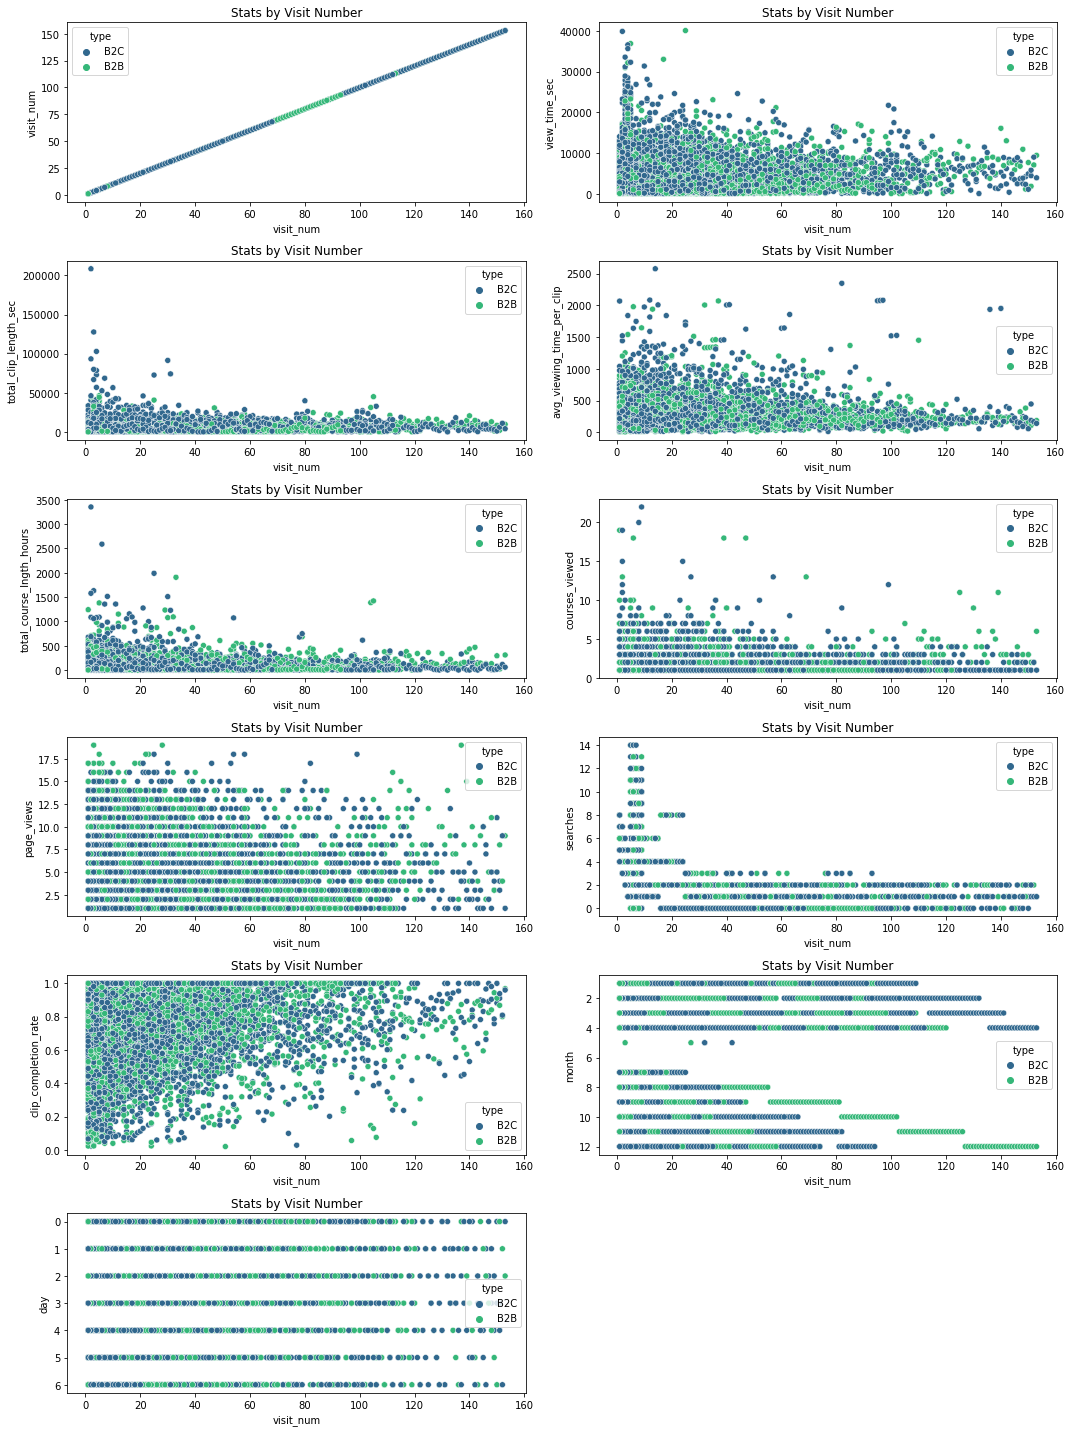

In [38]:
# columns to graph against visit number
cols = ['visit_num', 'view_time_sec', 'total_clip_length_sec', 'avg_viewing_time_per_clip', 'total_course_lngth_hours', 'courses_viewed', 'page_views', 'searches', 'clip_completion_rate', 'month', 'day']
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(15,20))
# loop through number of columns to plot
for i in range(len(cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(6, 2, plot)
    # scatterplots
    sns.scatterplot(data=df, x=df['visit_num'], y=df[cols[i]], hue=df['type'], palette="viridis")
    plt.title("Stats by Visit Number")

plt.tight_layout()
plt.show()

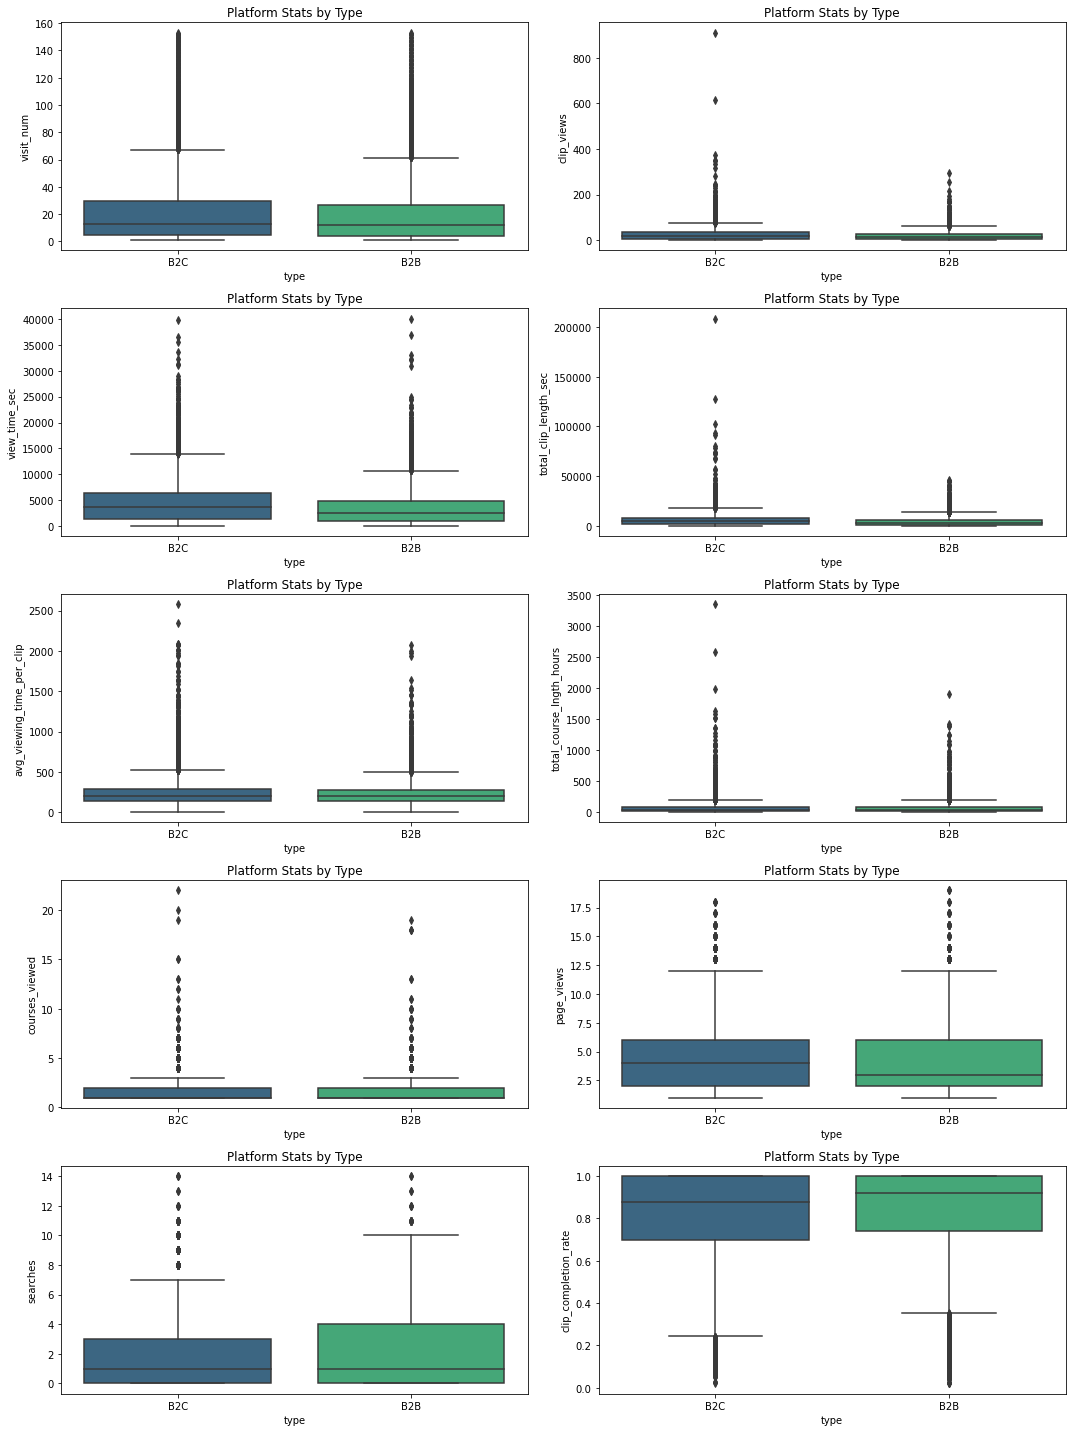

In [39]:
# columns to graph against type
cols = ['visit_num', 'clip_views', 'view_time_sec', 'total_clip_length_sec', 'avg_viewing_time_per_clip', 'total_course_lngth_hours', 'courses_viewed', 'page_views', 'searches', 'clip_completion_rate']
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(15,20))
# loop through number of columns to plot
for i in range(len(cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(5, 2, plot)
    # boxplots
    sns.boxplot(data=df, x=df['type'], y=df[cols[i]], palette="viridis")
    plt.title("Platform Stats by Type")

plt.tight_layout()
plt.show()

In [40]:
#export dataframe to CSV that an be connected to Tableau
df.to_csv('data_cleaned.csv')

### Recommendations <a class="anchor" id="recs"></a>

- Optimizing search results and creating more content based on user searches may increase the rate of returning users and help close the gap between 'first-time' users and 'second-time' users

- Creating higher quality and more engaging content may encourage users to stay engaged after their 3rd session

- Releasing new B2B content just before November and B2C content before July may help the platform capitalize on the potential seasonality that is seen over the duration of the data

#### [Jump to Top](#top)

### Questions <a class="anchor" id="questions"></a>

While inspecting the data initially, I noticed a number of null values which made up 110 empty observations. Despite being <1% of the total (13,754 records), I did not want to make assumptions about these observations. This raises the following questions:

- Could the empty records be present due to file corruption or some other error? 

- Could this possibly be linked to the small number of observations seen in May of 2018?

As of now there is no certainty in regards to the above, so further investigation will be required to determine the answers. 

#### [Jump to Top](#top)

### Appendix <a class="anchor" id="appendix"></a>

Description of fields:

1.	`acct_id`: The unique identifier for a customer account, otherwise known as the userhandle.
2.	`visit_num`: The sequential visit number for that acct_id. 
3.	`visit_dt`: The date the visit occurred.
4.	`clip_views`: The number of video clips viewed during the visit.
5.	`view_time_sec`: The actual time spent viewing video time from video clips during the visit. 
6.	`total_clip_length_sec`: The total length of the clips that were viewed. 
7.	`total_course_lngth_sec`: The total length of the course(s) from which video clips were viewed. 
8.	`courses_viewed`: The number of courses from which video clips were viewed in the visit. 
9.	`b2b_visit_indicator`: B2B= Business to Business. 1 = B2B and 0 = NOT B2B. This metrics is a binary indicator showing whether or not the visitor’s account was a B2B account at the time of the visit. If a visit is NOT B2B, then it is a B2C visit. B2C = Business to Consumer. 
10.	`page_views`: The number of page views during the visit. 
11.	`searches`: The number of site searches entered during the visit.


#### [Jump to Top](#top)